# Solely created for making the colored Racial clusters

Methodology -- 

- fit clf to AF, CF dataset as opposite labels. 
- find 2 thresholds upper bound (white) lower bound (azn) since the clf tends to put africans in the middle since it can't recognize their features it.

So uncertain examples are marked as black


In [1]:
from PIL import Image
import hdbscan
import time
import seaborn as sns
import pickle
import numpy as np
import pandas as pd
from umap import UMAP
from image_helpers import *
from tsne import image_scatter_plot
from sklearn.linear_model import LogisticRegression


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
sns.set_context("poster")
%pylab inline

import warnings
warnings.filterwarnings('ignore')
pylab.rcParams['figure.figsize'] = (15, 15)
pylab.rcParams['axes.grid'] = False
pylab.rcParams['axes.facecolor'] = 'white'
pylab.rcParams['axes.edgecolor'] = 'white'

Populating the interactive namespace from numpy and matplotlib


In [2]:
data, paths, encodings, arrays_rescaled, X = load_encodings('../data/CF_ALL_faces_encodings.pickle')
data_, paths_, encodings_, arrays_rescaled_, X_ = load_encodings('../data/AF_ALL_faces_encodings.pickle')
arrays_rescaled.extend(arrays_rescaled_) , encodings.extend(encodings_), paths.extend(paths_)

X = np.concatenate((X, X_)) 
len(encodings), len(paths), len(arrays_rescaled), X.shape[0]

(2361, 2361, 2361, 2361)

In [3]:
labels = np.r_[np.ones(len(data)), np.zeros(len(data_))]
labels.shape

(2361,)

In [4]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(class_weight='balanced_subsample', n_estimators=500, n_jobs=-1).fit(encodings, labels)
df = pd.DataFrame(rf.predict_proba(encodings)).applymap(lambda x: '%.3f' % x)
df.columns = ['af', 'cf']

df.index = map(lambda x: x.split('/')[-1].replace('_face.jpg',''), paths)


pd.Series(rf.predict(encodings)).value_counts()

0.0    1620
1.0     741
dtype: int64

In [5]:
_, paths, encodings, arrays_rescaled, X = load_encodings('../data/tinder_pics_2017_deduped_firsts_faces_encodings.pickle')
paths, encodings, arrays_rescaled, X = append_new_dataset(paths, encodings, arrays_rescaled, X, '../data/tinder_pics_dislikes_faces_firsts_deduped_encodings.pickle')
paths, encodings, arrays_rescaled, X = append_new_dataset(paths, encodings, arrays_rescaled, X, '../data/tinder_pics_likes_faces_deduped_firsts_encodings.pickle')


889 889 889 889
994 994 994 994


count    994.000000
mean       0.788052
std        0.285101
min        0.000000
25%        0.774000
50%        0.918000
75%        0.962000
max        1.000000
dtype: float64
skew --  -1.7672904612941547
kurtosis -- 1.7762248062094432


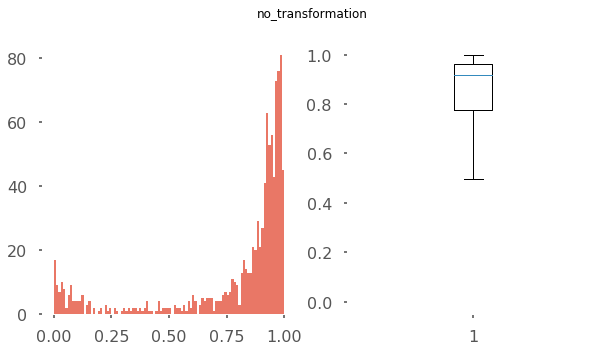

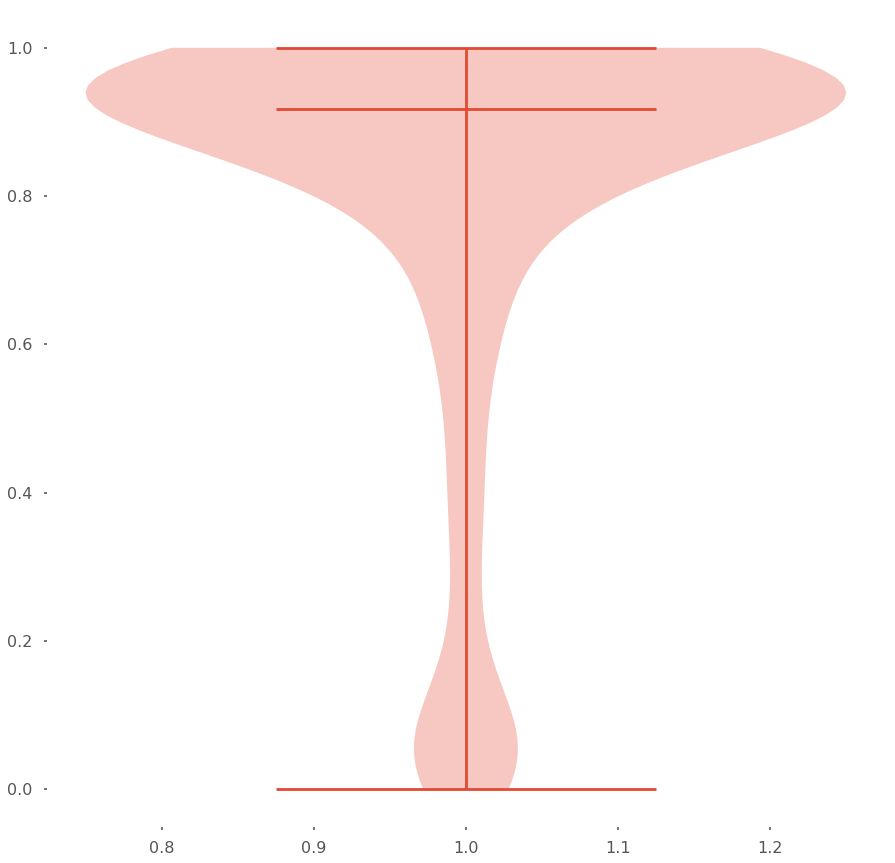

In [6]:
probas = rf.predict_proba(encodings)

plot_distribution(probas[:,1])

# Black cluster

38


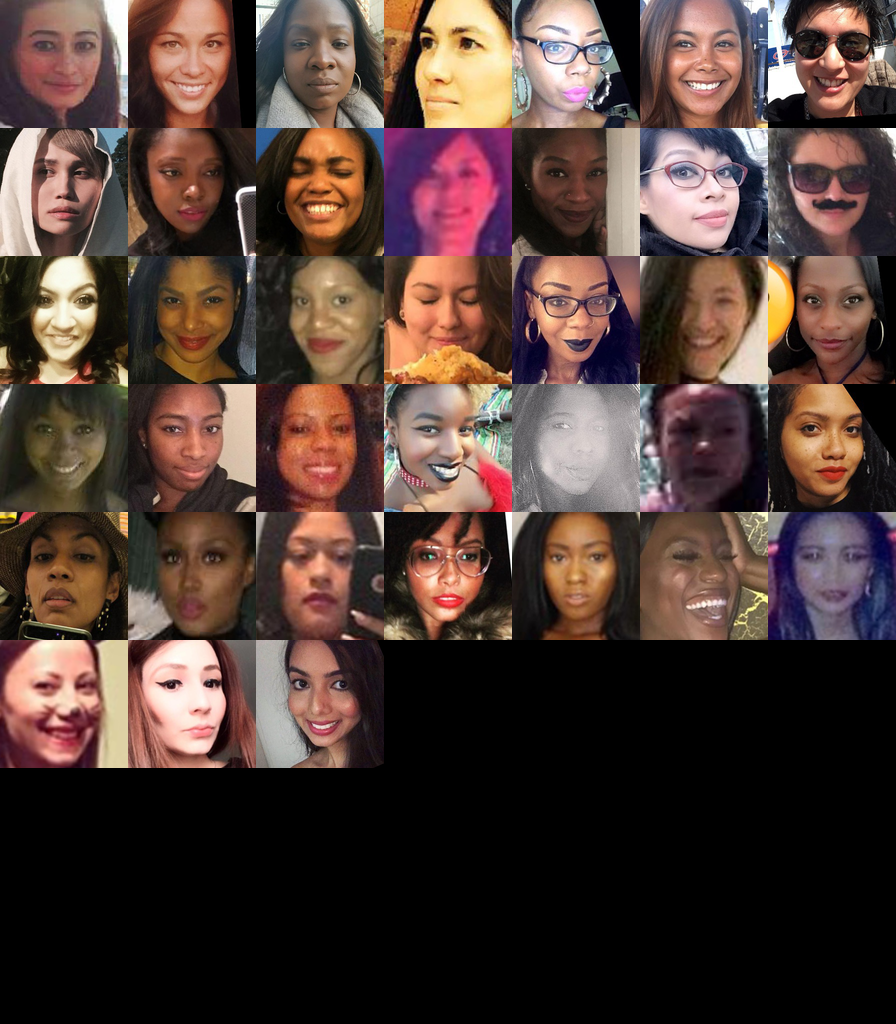

In [7]:
df_tinder_rf=  made_readable_df(rf.predict_proba(encodings),['nonewhite', 'white'])
df_tinder_rf = df_tinder_rf.applymap(float)

args = df_tinder_rf[(df_tinder_rf['white'] > 0.4) & (df_tinder_rf['white'] < 0.60)].index

print (len(args))
# display
display(montagify([np.array(arrays_rescaled[arg]) for arg in args],
                    (128,128), 
                  tiles=(7,8)))


In [26]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":50,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}



umap_embeddings = UMAP(**params).fit_transform(encodings)

# Local and global params

I wanted to retain the global directionality of the black data points oriented toward it's own cluster while maintaining distinct clusters - bst of both local and global params

The chart immediately below is what I'll be using .
- clusters are round and distinct
- blacks are in between 
- points are directional

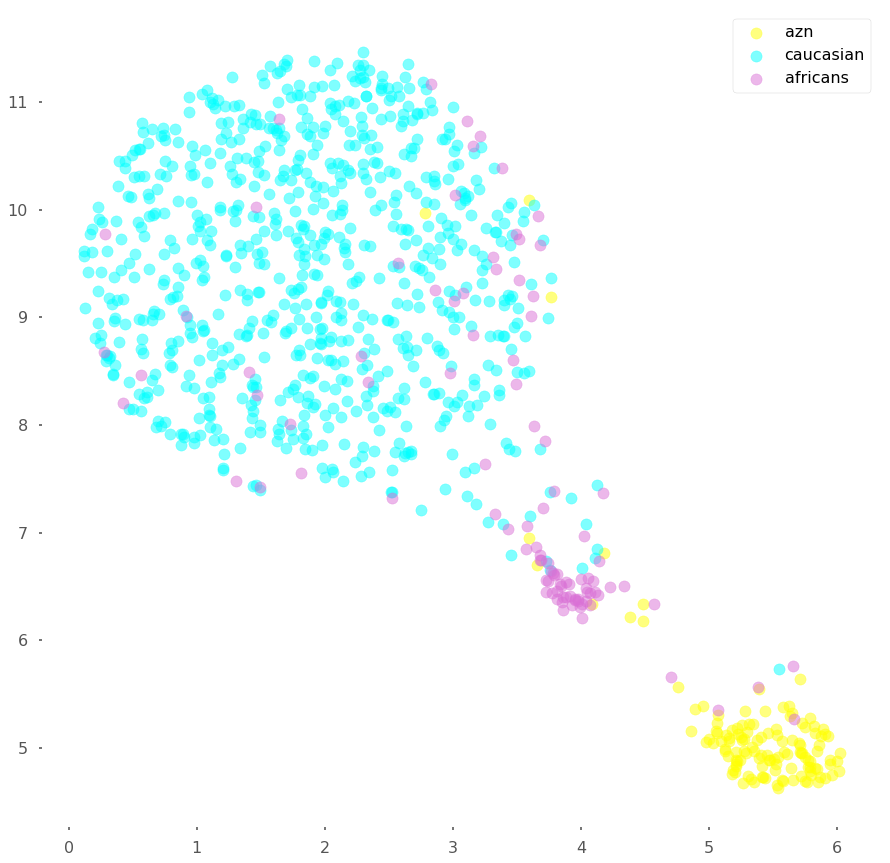

In [27]:

UPPER_BND = 0.6
LOWER_BND = 0.25

#azn
preds = [1.0 if prob > UPPER_BND else 0 for prob in probas[:,0]]

xx = umap_embeddings[:, 0]
yy = umap_embeddings[:, 1]

tup = [tup for idx, tup in enumerate(zip(xx, yy)) if preds[idx] == 1.0]
x, y = zip(*tup)
plt.scatter(x, y, color='yellow', alpha=0.5, label='azn')


#white
preds = [0 if prob < LOWER_BND else 1 for prob in probas[:,0]]

xx = umap_embeddings[:, 0]
yy = umap_embeddings[:, 1]

tup = [tup for idx, tup in enumerate(zip(xx, yy)) if preds[idx] == 0.0]
x, y = zip(*tup)
plt.scatter(x, y, color='cyan', alpha=0.5, label='caucasian')

#black
preds = [embedding for prob, embedding in zip(probas[:,0], umap_embeddings) \
     if (prob > LOWER_BND) and (prob < UPPER_BND)]

xx = np.array(preds)[:, 0]
yy = np.array(preds)[:, 1]
plt.scatter(xx, yy, color='orchid', alpha=0.5, label='africans')

plt.legend()
plt.show()

In [16]:
params = {
    #5 to 50, with a choice of 10 to 15 being a sensible default.
    "n_neighbors":5,

    #0.001 to 0.5, with 0.1 being a reasonable default.
    "min_dist":0.001,

    #metric: This determines the choice of metric used to measure distance in the input space. 
    "metric":'euclidean'
}



umap_embeddings = UMAP(**params).fit_transform(encodings)

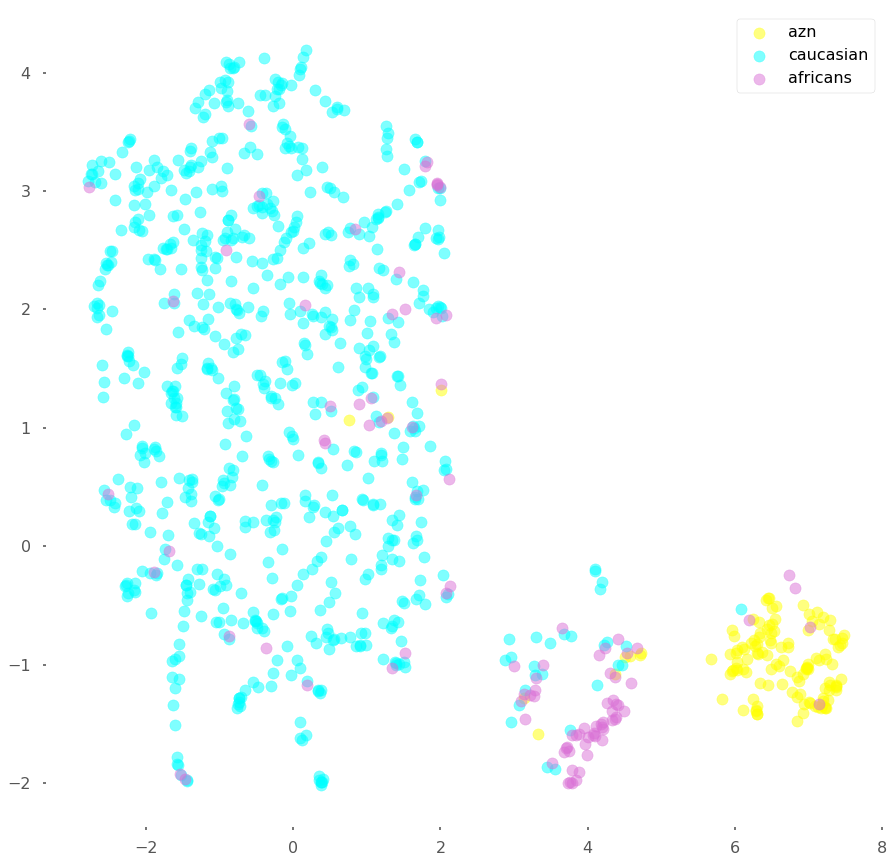

In [17]:
UPPER_BND = 0.6
LOWER_BND = 0.25

#azn
preds = [1.0 if prob > UPPER_BND else 0 for prob in probas[:,0]]

xx = umap_embeddings[:, 0]
yy = umap_embeddings[:, 1]

tup = [tup for idx, tup in enumerate(zip(xx, yy)) if preds[idx] == 1.0]
x, y = zip(*tup)
plt.scatter(x, y, color='yellow', alpha=0.5, label='azn')


#white
preds = [0 if prob < LOWER_BND else 1 for prob in probas[:,0]]

xx = umap_embeddings[:, 0]
yy = umap_embeddings[:, 1]

tup = [tup for idx, tup in enumerate(zip(xx, yy)) if preds[idx] == 0.0]
x, y = zip(*tup)
plt.scatter(x, y, color='cyan', alpha=0.5, label='caucasian')

#black
preds = [embedding for prob, embedding in zip(probas[:,0], umap_embeddings) \
     if (prob > LOWER_BND) and (prob < UPPER_BND)]

xx = np.array(preds)[:, 0]
yy = np.array(preds)[:, 1]
plt.scatter(xx, yy, color='orchid', alpha=0.5, label='africans')

plt.legend()
plt.show()